# Plot how the number of stations differs across Belgian provinces using a color-coded heat map. Do the same while adjusting for the number of inhabitants.

In [9]:
import src.data_processing.data as data
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

<AxesSubplot: >

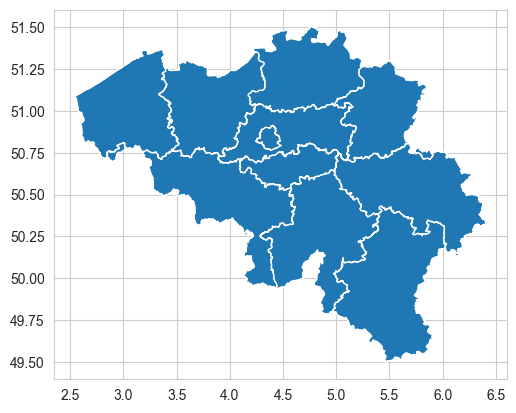

In [10]:
provinces = data.provinces
stations = data.stations
inhabitants = data.inhabitants_per_province
provinces.plot()

Get the number of stations per province THIS TOOK ME SO LONG TO MAKE

In [11]:

provinces_count = df = pd.DataFrame(columns=['province', 'station'])
for index, row in stations.iterrows():
        for index2, row2 in provinces.iterrows():
                if row2['geometry'].contains(Point(row['longitude'], row['latitude'])):
                    provinces_count = pd.concat([provinces_count, pd.DataFrame([[row['name'], row2['NE_Name']]], columns=['station', 'province'])])
                    # provinces_count = provinces_count.append({'station': row['name'], 'province': row2['NE_Name']}, ignore_index=True)
                     # print(row['name'] + ' is located in ' + row2['NE_Name'])
province_count = pd.DataFrame(provinces_count["province"].value_counts())
provinces_count['count'] = provinces_count.groupby('province')['province'].transform('count')
del provinces_count['station']
provinces_count = provinces_count.drop_duplicates()
provinces_count = provinces_count.rename(index=str, columns={'province': 'NE_Name'})
provinces_count



,NE_Name,count
0,Oost-Vlaanderen,82
0,Vlaams Brabant,65
0,West-Vlaanderen,36
0,Henegouwen,93
0,Limburg,21
0,Luik,64
0,Namen,54
0,Antwerpen,55
0,Brussel,34
0,Waals Brabant,28


In [12]:
provinces_count["count"] = provinces_count["count"].astype(float)
provinces = provinces.merge(provinces_count, on='NE_Name')
provinces

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,count
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",55.0
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",34.0
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",65.0
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",28.0
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",36.0
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ...",82.0
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7...",93.0
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ...",64.0
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7...",21.0
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ...",30.0


Heatmap of provinces with weight number of stations

<AxesSubplot: >

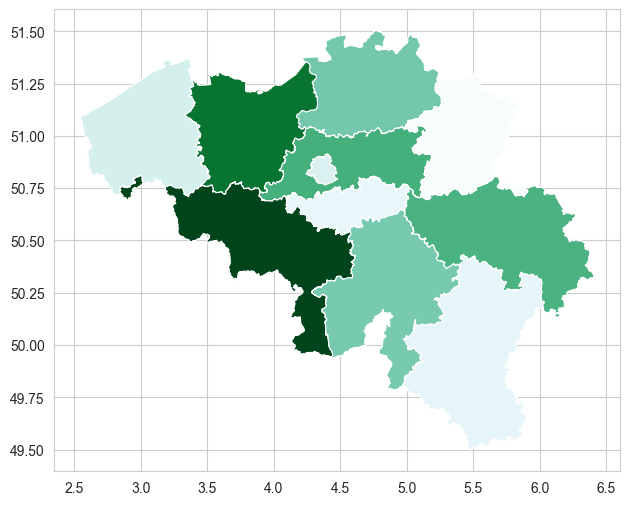

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 6))
provinces.plot(column='count', cmap='BuGn', linewidth=0.8, ax=ax)

In [14]:
inhabitants = inhabitants.rename(index = str, columns = {"Province" : "NE_Name"})
inhabitants['Inhabitants']= inhabitants['Inhabitants'].astype(float)
provinces = provinces.merge(inhabitants, on = "NE_Name")
provinces


,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,count,Inhabitants
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",55.0,1875524.0
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",34.0,1219970.0
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",65.0,1162084.0
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",28.0,407397.0
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",36.0,1203312.0
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ...",82.0,1531745.0
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7...",93.0,1345947.0
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ...",64.0,1109067.0
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7...",21.0,880397.0
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ...",30.0,288722.0


Heatmap of provinces with weight Inhabitants

<AxesSubplot: >

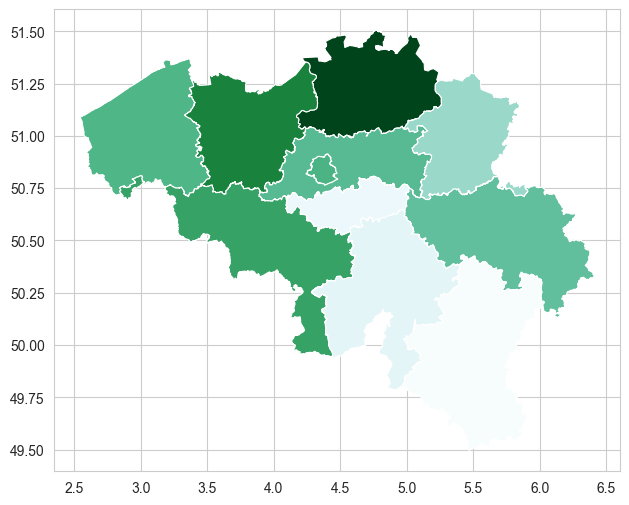

In [15]:
fig, ax = plt.subplots(1, figsize=(10, 6))
provinces.plot(column='Inhabitants', cmap='BuGn', linewidth=0.8, ax=ax)

In [16]:
provinces["stations_adjusted"] = provinces["count"] / provinces["Inhabitants"]
provinces

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,count,Inhabitants,stations_adjusted
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",55.0,1875524.0,0.000029
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",34.0,1219970.0,0.000028
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",65.0,1162084.0,0.000056
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",28.0,407397.0,0.000069
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",36.0,1203312.0,0.000030
5,6,40000,Oost-Vlaanderen,Vlaanderen,Flandres Oriental|Fiandra Orientale|Flandes Or...,Province,Flandre Orientale,Oost-Vlaanderen,"POLYGON ((4.31166 51.29250, 4.31431 51.29112, ...",82.0,1531745.0,0.000054
6,7,50000,Hainaut,Wallonie,Henegouwen|Hennegau,Province,Hainaut,Henegouwen,"MULTIPOLYGON (((3.71031 50.78190, 3.71065 50.7...",93.0,1345947.0,0.000069
7,8,60000,Liège,Wallonie,Luik|Liegi|Lieja|Lüttich,Province,Liège,Luik,"POLYGON ((6.13338 50.12956, 6.13309 50.12968, ...",64.0,1109067.0,0.000058
8,9,70000,Limburg,Vlaanderen,Limbourg|Limburgo,Province,Limbourg,Limburg,"MULTIPOLYGON (((5.77703 50.78285, 5.77662 50.7...",21.0,880397.0,0.000024
9,10,80000,Luxembourg,Wallonie,Lussemburgo|Luxemburg|Luxemburgo,Province,Luxembourg,Luxemburg,"POLYGON ((5.43891 50.42170, 5.43908 50.42165, ...",30.0,288722.0,0.000104


Heatmap of provinces with weight number of stations divided by the number of inhabitants

<AxesSubplot: >

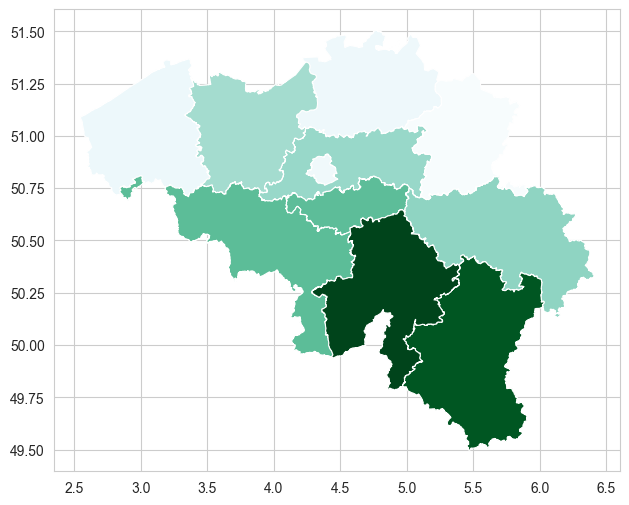

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 6))
provinces.plot(column='stations_adjusted', cmap='BuGn', linewidth=0.8, ax=ax)

Plot the stations on the map

In [18]:
dict = {'Name': stations["name"], 'lat': stations["latitude"], 'lon': stations["longitude"]}
stations_df = pd.DataFrame(dict, columns = ['Name', 'lat', 'lon'])
stations_df

,Name,lat,lon
3,Aalst,50.942813,4.039653
4,Aalst-Kerrebroek,50.948377,4.024407
5,Aalter,51.092295,3.447848
6,Aarschot,50.984406,4.824043
7,Aarsele,50.984460,3.418363
...,...,...,...
669,Zolder,51.033548,5.329900
670,Zonhoven,50.989557,5.348815
671,Zottegem,50.869102,3.814410
673,Zwijndrecht,51.214108,4.329780


<AxesSubplot: xlabel='lon', ylabel='lat'>

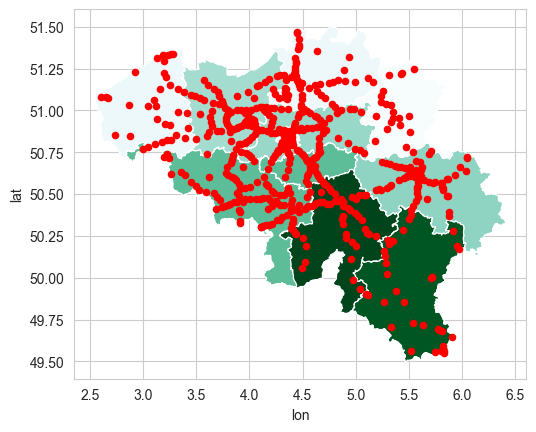

In [19]:
dict = {'Name': stations["name"], 'lat': stations["latitude"], 'lon': stations["longitude"]}
# create data frame
stations_df = pd.DataFrame(dict, columns = ['Name', 'lat', 'lon'])
ax = stations_df.plot('lon', 'lat', 'scatter',  color='red', zorder =10)
provinces.plot(column='stations_adjusted', cmap='BuGn', linewidth=0.8, ax=ax)



In [20]:
type(provinces)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

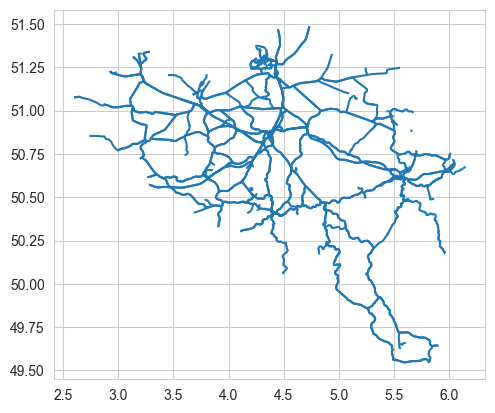